In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

In [2]:
from pathlib import Path

In [12]:
import tensorflow as tf

## IMPORT & EXPLORE

#### FUNCTIONS

In [3]:
def directory_files(directory, item_type=None):
    return sorted([str(path) for path in directory.rglob(f'*.{item_type}')])


In [4]:
def load_images(image_paths, target_size=(224, 224)):
    loaded_images = []
    for path in image_paths:
        try:
            image = tf.io.read_file(path)
            image = tf.image.decode_image(image, channels=3)  # Keep RGB

            image = tf.image.resize(image, target_size)
            image = image / 255.0  # Normalize

            image.set_shape((target_size[0], target_size[1], 3))  # RGB shape

            loaded_images.append(image)
        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images


In [5]:
def display_examples(images, labels, num_examples=5):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        ax.imshow(images[i])  # Display the image
        ax.set_title(f"Label: {labels[i]}")  # Display the label
        ax.axis("off")  # Hide axes
    
    plt.show()

#### DATA

In [6]:
flip_book_images_dir = Path(r"C:\Users\User\Desktop\DATA SCIENCE\DataSets\flip_book_data")

In [7]:
flip_book_images_dir_file_paths = directory_files( directory = flip_book_images_dir,
                                                   item_type = 'jpg' )

In [8]:
len(flip_book_images_dir_file_paths)

13094

In [9]:
flip_book_images_dir_file_paths = pd.Series( flip_book_images_dir_file_paths ).sample( frac = 1, 
                                                                                       replace = False, 
                                                                                       random_state = 42 )

flip_book_images_dir_file_paths = flip_book_images_dir_file_paths.sample( 5000, 
                                                                          replace = False, 
                                                                          random_state = 43 )

flip_book_images_dir_file_paths = list(flip_book_images_dir_file_paths)


In [10]:
flip_book_images_dir_file_paths

['C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\education\\images\\36_занятий_для_будущих_отличников_Задания_по_разви_511.jpg',
 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\psychology\\images\\Профессия_переговорщик_Как_управлять_любой_коммуни_244.jpg',
 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\fantasy\\images\\БеглецБродяга_1494.jpg',
 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\education\\images\\Раскраска_Раскрашиваем_и_учимся_Овощи_1096.jpg',
 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\education\\images\\Тренажёр_по_исправлению_почерка_Тетрадь_2_Русский__231.jpg',
 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\art\\images\\Flydogs_1420.jpg',
 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\science\\images\\Квантовая_физика_Для_тех_кто_хочет_все_успеть_133.jpg',
 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\

In [13]:
flip_book_images = load_images( image_paths = flip_book_images_dir_file_paths,
                                target_size=(224, 224) )

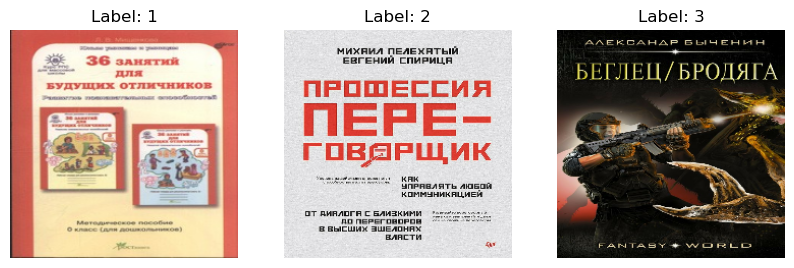

In [15]:
display_examples( images = flip_book_images,
                  labels = ['1','2','3'],
                  num_examples = 3 )

In [17]:
np.array(flip_book_images).shape

(5000, 224, 224, 3)

## CLEAN & PREPARE

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
flip_book_images_train, flip_book_images_test = train_test_split( flip_book_images,
                                                                  train_size = 0.8,
                                                                  random_state = 42 )

flip_book_images_train, flip_book_images_validation = train_test_split( flip_book_images_train,
                                                                        train_size = 0.8,
                                                                        random_state = 42 )

In [21]:
for array in [flip_book_images_train, flip_book_images_test, flip_book_images_validation]:
    print(np.array(array).shape)

(3200, 224, 224, 3)
(1000, 224, 224, 3)
(800, 224, 224, 3)


## SAVE

In [22]:
np.savez_compressed(

    "flip_book_images.npz",

    train = flip_book_images_train,
    test = flip_book_images_test,
    validation = flip_book_images_validation
)

In [23]:
#### TEST LOAD

flip_book_images = np.load(r"C:\Users\User\Downloads\flip_book_images.npz")


flip_book_images_validation = flip_book_images['validation']


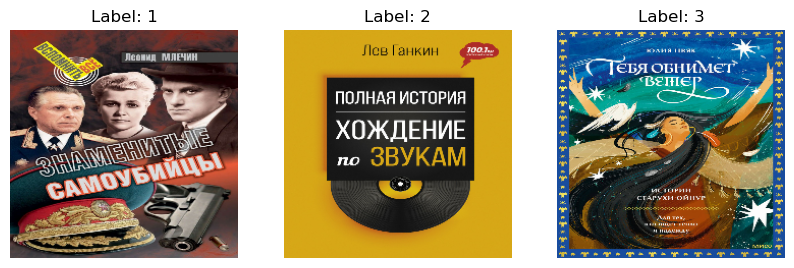

In [24]:
display_examples( images = flip_book_images_validation,
                  labels = ['1','2','3'],
                  num_examples = 3 )